In [262]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [263]:
browser = Browser('chrome')

In [264]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [265]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [266]:
# Extract all rows of data
# Scrape the table data
mars_weather_table = soup.find('table', class_='table')
# Extract the headers
headers = [header.text for header in mars_weather_table.find_all('th')]


In [267]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
# Extract the data rows
for row in mars_weather_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    rows.append([cell.text for cell in cells])


In [268]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=headers)

In [269]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [270]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [271]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['month'] = pd.to_numeric(df['month'])
df['min_temp'] = pd.to_numeric(df['min_temp'])
df['pressure'] = pd.to_numeric(df['pressure'])

In [272]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


In [273]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [274]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"Number of Martian days worth of data: {num_sols}")

Number of Martian days worth of data: 1867


In [275]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


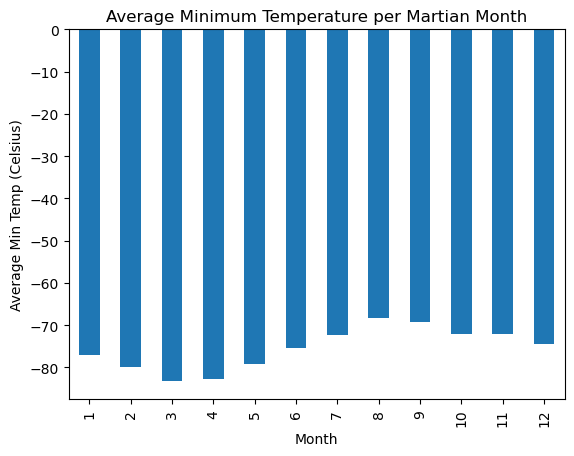

In [276]:
# Plot the average minimum temperature by month
plt.figure()
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature per Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Min Temp (Celsius)')
plt.show()

In [277]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [278]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


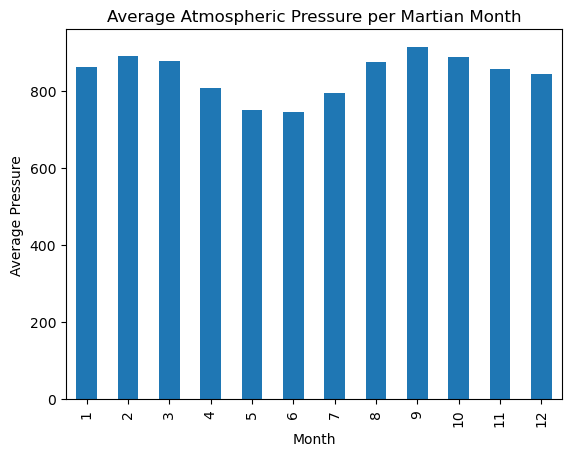

In [279]:
# Plot the average pressure by month
plt.figure()
avg_pressure.plot(kind='bar', title='Average Atmospheric Pressure per Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

In [280]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure = df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


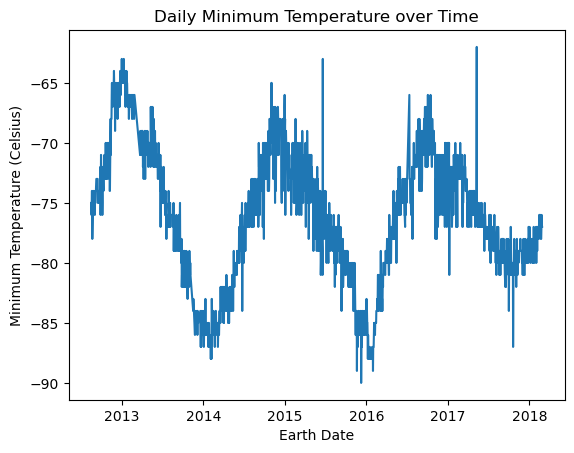

In [281]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# 5. About how many Earth days in a Martian year
plt.figure()
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.title('Daily Minimum Temperature over Time')
plt.xlabel('Earth Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()

In [282]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)

In [283]:
browser.quit()